**1. BetterRnnlm 클래스로 언어모델을 만들고 BetterRnnlm.pkl에서 학습된 파라미터를 불러오시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from ch06.better_rnnlm import BetterRnnlm
from dataset import ptb
from common.util import *

In [2]:
model = BetterRnnlm()
model.load_params()

**2. 단어
$$
\text{'in'}
$$
을 입력했을 때, 언어모델이 다음에 등장할 단어로 예측하는 상위 스코어 10개 단어를 출력하시오.**

in의 인덱스를 구하기 위해 PTB 데이터 셋의 word_to_id 딕셔너리를 불러옵니다.  
훈련 데이터와 테스트 데이터는 corpus는 다르지만 word_to_id와 id_to_word는 공유합니다.  
코드는 배치묶음과 시간블럭이 들어온다고 가정하기 때문에 단어 하나를 넣더라도 행렬 형식으로 입력합니다.
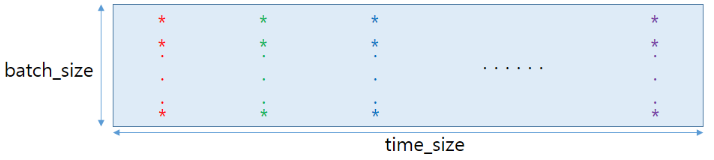

In [3]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

x = np.array([[word_to_id['in']]])

스코어는 3차원 텐서입니다.  
배치크기 $\times$ 시간블럭크기 행렬 안에 스코어 벡터들이 있습니다.  
스코어 벡터의 $k$번째 원소는 인덱스가 $k$인 어휘의 스코어 입니다.  
현재는 배치크기도 1이고 시간블럭크기도 1이지만 형식상으로는 3차원 텐서입니다.  
[0,0]으로 벡터로 만들어 준후 np.argsort를 이용해서 스코어 값이 높은 인덱스를 구합니다.
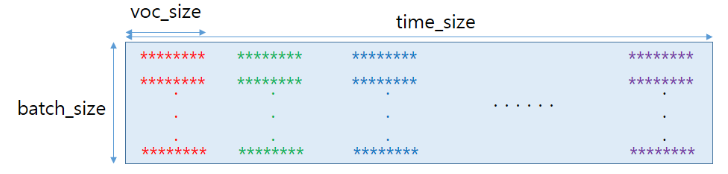

문법적으로는 맞지만 범용적인 단어들이 후보들로 나옵니다.  
단어 하나만 주어지면 사람에게 물어봐도 의미있는 단어를 대기가 막막하지요.

In [4]:
score = model.predict(x)
score = score[0,0]
next_words = np.argsort(-score)[:10]
for word in next_words:
    print(id_to_word[word])

the
a
N
<unk>
new
an
its
which
recent
this


**3. 텍스트
$$
\text{'The global company Honda produces cars in'}
$$
을 입력했을 때, 언어모델이 다음에 등장할 단어로 예측하는 상위 스코어 10개 단어를 출력하시오.
먼저 hidden state와 cell state를 리셋하시오.**

hidden state와 cell state는 리셋해줍시다.  
그렇지 않으면 두 문제의 텍스트를 이어붙인 텍스트로 다음 단어를 예측하는 셈이 됩니다.

In [5]:
model.reset_state()

주어진 텍스트를 전처리합니다.

In [6]:
text = 'The global company Honda produces cars in'
text = text.lower()
text = text.split()
xs = [word_to_id[word] for word in text]
xs = np.array([xs])

배치크기는 1이고 시간블럭크기는 7입니다.  
텍스트 다음에 등장할 단어를 예측하는 문제이므로 타임블럭에서 마지막 스코어 벡터가 필요합니다.  
[0,-1]로 마지막 스코어 벡터를 선택합니다.

범용적인 the, a, its, an과 전처리된 N, unk를 제외하면 japan, europe, france, britain과 같은 국가명이 출력됩니다.  
in 앞에 등장한 단어들이 LSTM층을 타고 전달된 덕분입니다.

In [7]:
score = model.predict(xs)
score = score[0,-1]
next_words = np.argsort(-score)[:10]
for word in next_words:
    print(id_to_word[word])

the
N
japan
<unk>
a
its
europe
france
an
britain


**4. 텍스트
$$
\text{'New car will be released in'}
$$
을 입력했을 때, 언어모델이 다음에 등장할 단어로 예측하는 상위 스코어 10개 단어를 출력하시오.
먼저 hidden state와 cell state를 리셋하시오.**

역시 hidden state와 cell state는 리셋해줍시다.

In [8]:
model.reset_state()

주어진 텍스트를 전처리합니다.

In [9]:
text = 'New car will be released in'
text = text.lower()
text = text.split()
xs = [word_to_id[word] for word in text]
xs = np.array([xs])

범용적인 the, a와 전처리된 N, unk를 제외하면 december, early, late, january, september, new와 같이 시간과 관련된 단어들이 출력됩니다.  
in 앞에 등장한 단어들이 LSTM층을 타고 전달된 덕분입니다.

In [10]:
score = model.predict(xs)
score = score[0,-1]
next_words = np.argsort(-score)[:10]
for word in next_words:
    print(id_to_word[word])
    
model.reset_state()

the
N
a
<unk>
december
early
late
january
september
new
